### This notebook uses the data obtained on Firth road using the veroboard amplifier and aims to determine the 
### highest frequency created by the car in the frequency spectrum

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
from scipy.signal import stft

# Audi A1 Driving at 20km/h

### Dataset 1

In [62]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('40ksps/20km_h.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array


In [63]:
# Original data at 20 ks/s
original_data = voltage_data

# Downsampling factor (20 ks/s to 1 ks/s)
downsampling_factor = 5

# Calculate the length of the downsampled array
downsampled_length = len(original_data) // downsampling_factor

# Create an empty array for the downsampled data
downsampled_data = np.empty(downsampled_length)

# Perform downsampling by averaging
for i in range(downsampled_length):
    start_index = i * downsampling_factor
    end_index = start_index + downsampling_factor
    downsampled_data[i] = np.mean(original_data[start_index:end_index])


In [64]:
target = np.array(1000)



for i in range(len(downsampled_data)):
    if downsampled_data[i] > 1.875:
        target = downsampled_data[i-5000:5000+i]
        
        break
    


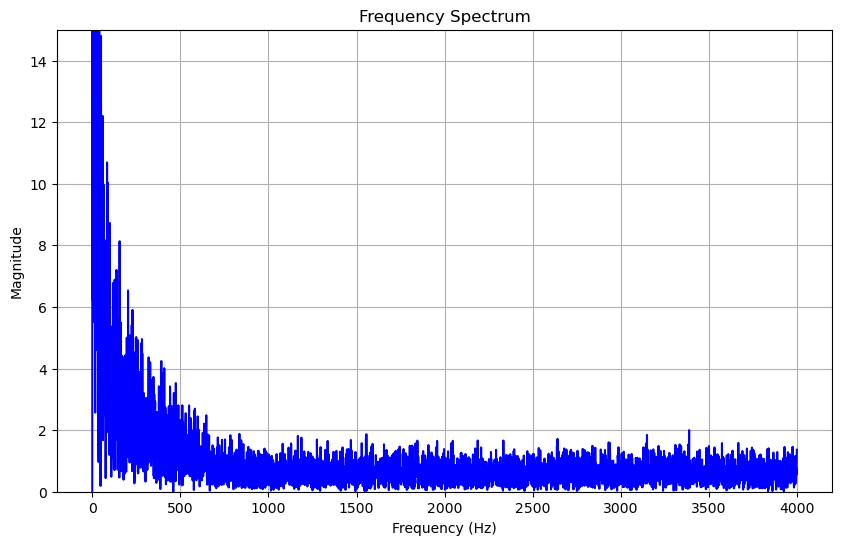

In [65]:
# Sampling frequency (inverse of the time step)
sampling_frequency = 8000

# Perform the FFT
fft_result = np.fft.fft(target)
fft_freqs = np.fft.fftfreq(len(target), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0,15)
plt.title('Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()

### Plotting Spectorgram of above data

/var/folders/g1/gj5y689n0w5fnjjfvlmbhpgr0000gn/T/ipykernel_8938/1918866803.py:17: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 20 * np.log10(np.abs(Sxx)), shading='auto')


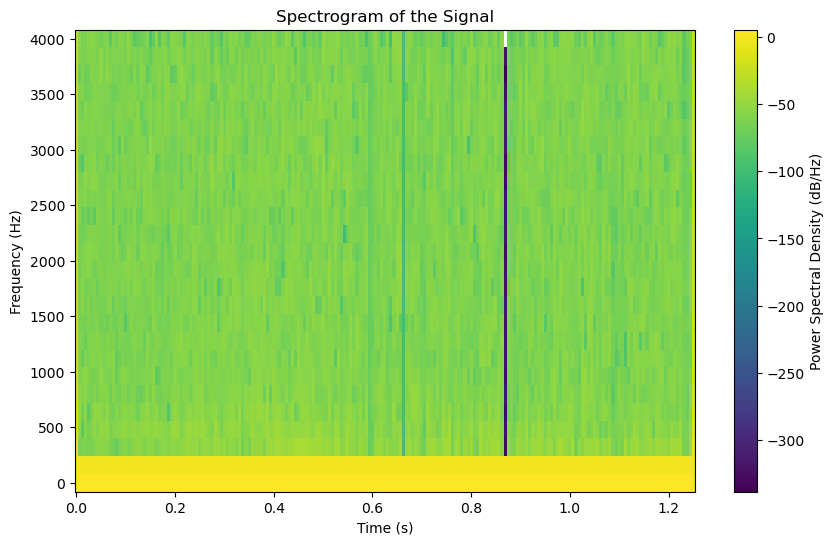

In [66]:
# Define your signal (you can replace this with your actual signal)
# For this example, we'll generate a simple sinusoidal signal.
sample_rate = 8000  # Sample rate in Hz
signal = target

# Define parameters for the STFT
segment_length = 50  # Number of samples per segment
overlap = 0  # Overlap between segments (adjust as needed)
nperseg = segment_length
noverlap = overlap

# Compute the spectrogram in 50-sample segments
frequencies, times, Sxx = stft(signal, fs=sample_rate, nperseg=nperseg, noverlap=noverlap)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 20 * np.log10(np.abs(Sxx)), shading='auto')
plt.colorbar(label='Power Spectral Density (dB/Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of the Signal')
plt.show()


### Isolating frequencies created by the car

### This code take the average magnitude of frequencies between 3khz and 4khz and only keeps frequencies with a magnitude greater than 2x that average.
### It then sets all magnitudes to 0 if they are greater than the average magnitude of the previous 20 frequencies

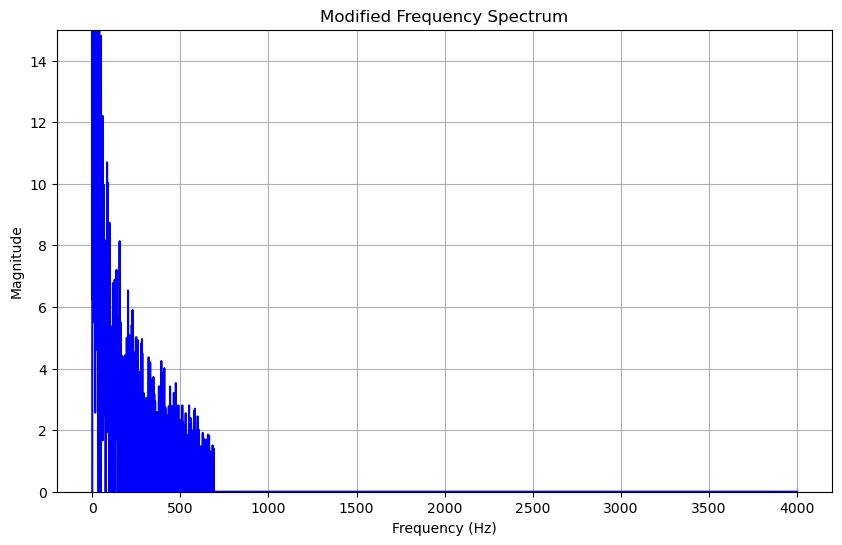

In [67]:
# Sample frequency data and FFT
sampling_frequency = 8000
fft_result = np.fft.fft(target)
fft_freqs = np.fft.fftfreq(len(target), 1 / sampling_frequency)
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0

# Define the frequency range (3000 Hz to 4000 Hz)
start_freq = 3500
end_freq = 4000

# Calculate the average magnitude in the specified frequency range
average_magnitude = np.mean(fft_magnitude[(fft_freqs >= start_freq) & (fft_freqs <= end_freq)])

# Calculate the threshold magnitude (twice the average magnitude)
threshold_magnitude = 2 * average_magnitude

# Set the magnitude of frequencies below the threshold to 0
fft_magnitude[fft_magnitude < threshold_magnitude] = 0

# Set the magnitude of frequencies to zero if they are 5 times bigger than the average magnitude of the previous 10 frequencies
window_size = 50
for i in range(window_size, len(fft_magnitude)):
    previous_magnitudes = fft_magnitude[i - window_size:i]
    if fft_magnitude[i] > 5 * np.mean(previous_magnitudes):
        fft_magnitude[i] = 0

# Plot the modified frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0, 15)
plt.title('Modified Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()


### Dataset 2

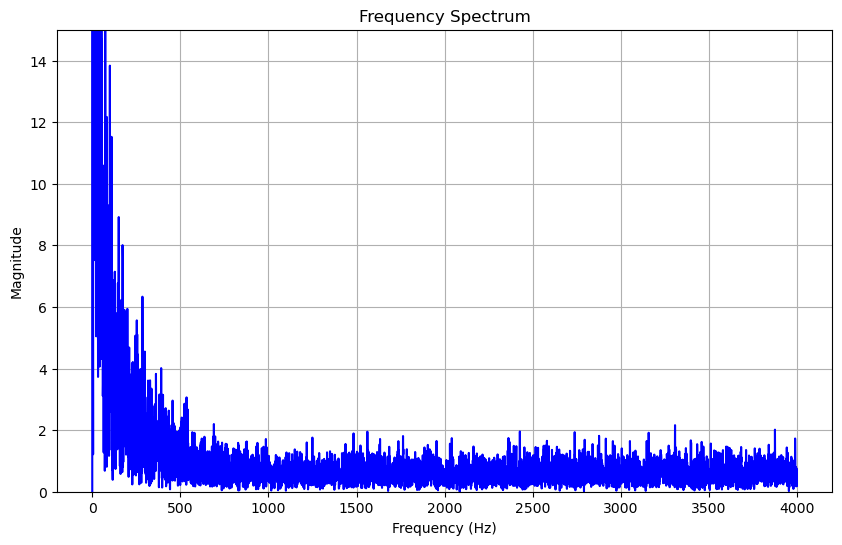

In [68]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('40ksps/20km_h2.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array

# Original data at 20 ks/s
original_data = voltage_data

# Downsampling factor (20 ks/s to 1 ks/s)
downsampling_factor = 5

# Calculate the length of the downsampled array
downsampled_length = len(original_data) // downsampling_factor

# Create an empty array for the downsampled data
downsampled_data = np.empty(downsampled_length)

# Perform downsampling by averaging
for i in range(downsampled_length):
    start_index = i * downsampling_factor
    end_index = start_index + downsampling_factor
    downsampled_data[i] = np.mean(original_data[start_index:end_index])

target = np.array(1000)



for i in range(len(downsampled_data)):
    if downsampled_data[i] > 1.875:
        target = downsampled_data[i-5000:5000+i]
        
        break
    
# Sampling frequency (inverse of the time step)
sampling_frequency = 8000

# Perform the FFT
fft_result = np.fft.fft(target)
fft_freqs = np.fft.fftfreq(len(target), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0,15)
plt.title('Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()

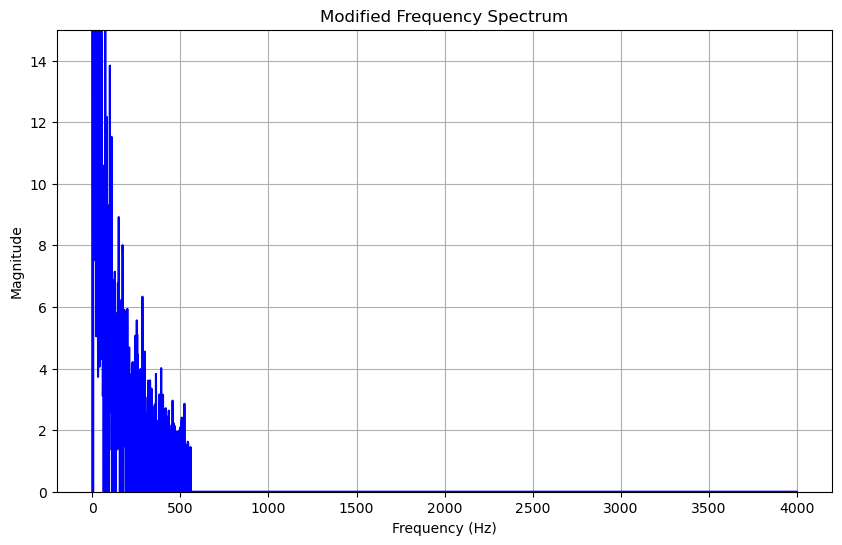

In [69]:
# Sample frequency data and FFT
sampling_frequency = 8000
fft_result = np.fft.fft(target)
fft_freqs = np.fft.fftfreq(len(target), 1 / sampling_frequency)
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0

# Define the frequency range (3000 Hz to 4000 Hz)
start_freq = 3500
end_freq = 4000

# Calculate the average magnitude in the specified frequency range
average_magnitude = np.mean(fft_magnitude[(fft_freqs >= start_freq) & (fft_freqs <= end_freq)])

# Calculate the threshold magnitude (twice the average magnitude)
threshold_magnitude = 2 * average_magnitude

# Set the magnitude of frequencies below the threshold to 0
fft_magnitude[fft_magnitude < threshold_magnitude] = 0

# Set the magnitude of frequencies to zero if they are 5 times bigger than the average magnitude of the previous 10 frequencies
window_size = 50
for i in range(window_size, len(fft_magnitude)):
    previous_magnitudes = fft_magnitude[i - window_size:i]
    if fft_magnitude[i] > 5 * np.mean(previous_magnitudes):
        fft_magnitude[i] = 0

# Plot the modified frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0, 15)
plt.title('Modified Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()


### Dataset 3

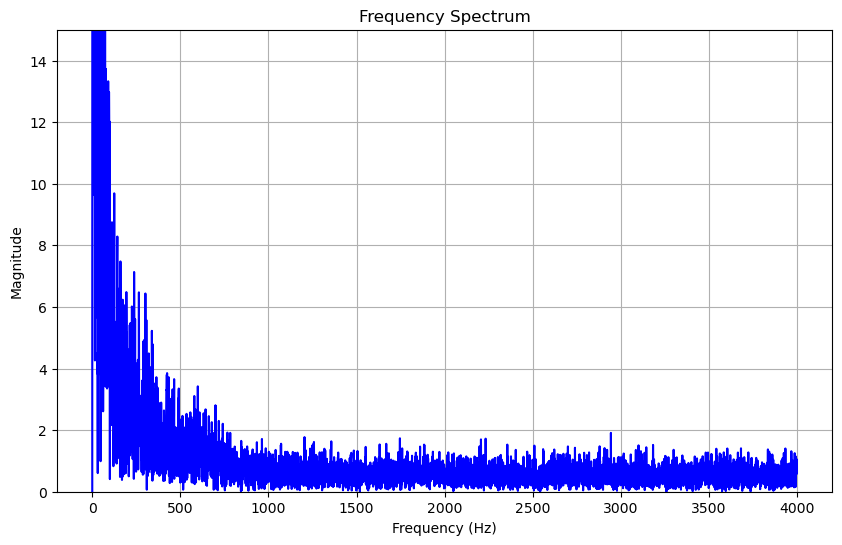

In [70]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('40ksps/20km_h3.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array

# Original data at 20 ks/s
original_data = voltage_data

# Downsampling factor (20 ks/s to 1 ks/s)
downsampling_factor = 5

# Calculate the length of the downsampled array
downsampled_length = len(original_data) // downsampling_factor

# Create an empty array for the downsampled data
downsampled_data = np.empty(downsampled_length)

# Perform downsampling by averaging
for i in range(downsampled_length):
    start_index = i * downsampling_factor
    end_index = start_index + downsampling_factor
    downsampled_data[i] = np.mean(original_data[start_index:end_index])

target = np.array(1000)



for i in range(len(downsampled_data)):
    if downsampled_data[i] > 1.875:
        target = downsampled_data[i-5000:5000+i]
        
        break
    
# Sampling frequency (inverse of the time step)
sampling_frequency = 8000

# Perform the FFT
fft_result = np.fft.fft(target)
fft_freqs = np.fft.fftfreq(len(target), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0,15)
plt.title('Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()


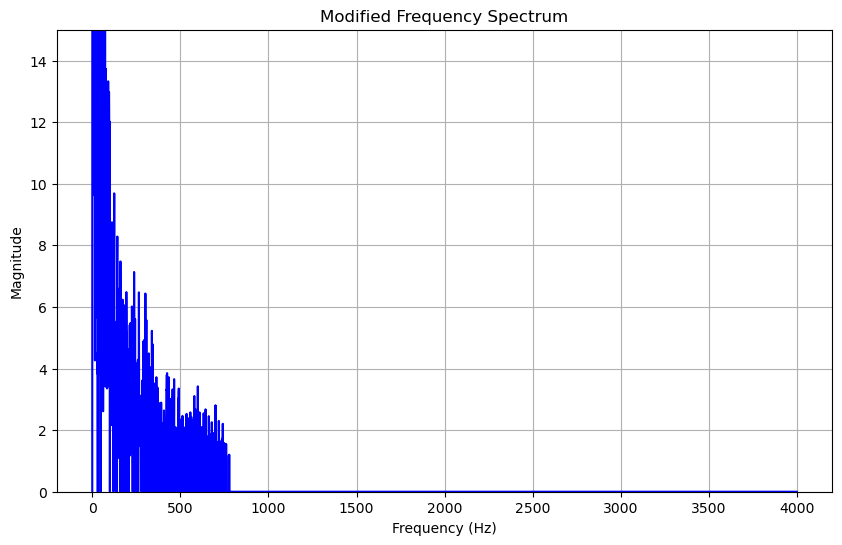

In [71]:
# Sample frequency data and FFT
sampling_frequency = 8000
fft_result = np.fft.fft(target)
fft_freqs = np.fft.fftfreq(len(target), 1 / sampling_frequency)
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0

# Define the frequency range (3000 Hz to 4000 Hz)
start_freq = 3500
end_freq = 4000

# Calculate the average magnitude in the specified frequency range
average_magnitude = np.mean(fft_magnitude[(fft_freqs >= start_freq) & (fft_freqs <= end_freq)])

# Calculate the threshold magnitude (twice the average magnitude)
threshold_magnitude = 2 * average_magnitude

# Set the magnitude of frequencies below the threshold to 0
fft_magnitude[fft_magnitude < threshold_magnitude] = 0

# Set the magnitude of frequencies to zero if they are 5 times bigger than the average magnitude of the previous 10 frequencies
window_size = 50
for i in range(window_size, len(fft_magnitude)):
    previous_magnitudes = fft_magnitude[i - window_size:i]
    if fft_magnitude[i] > 5 * np.mean(previous_magnitudes):
        fft_magnitude[i] = 0

# Plot the modified frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0, 15)
plt.title('Modified Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()


# Audi A1 Driving at 40km/h

### Dataset 1

In [72]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('40ksps/40km_h.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array



In [73]:
# Original data at 20 ks/s
original_data = voltage_data

# Downsampling factor (20 ks/s to 1 ks/s)
downsampling_factor = 5

# Calculate the length of the downsampled array
downsampled_length = len(original_data) // downsampling_factor

# Create an empty array for the downsampled data
downsampled_data = np.empty(downsampled_length)

# Perform downsampling by averaging
for i in range(downsampled_length):
    start_index = i * downsampling_factor
    end_index = start_index + downsampling_factor
    downsampled_data[i] = np.mean(original_data[start_index:end_index])


In [74]:
target = np.array(1000)



for i in range(len(downsampled_data)):
    if downsampled_data[i] > 1.875:
        target = downsampled_data[i-5000:5000+i]
        
        break
    

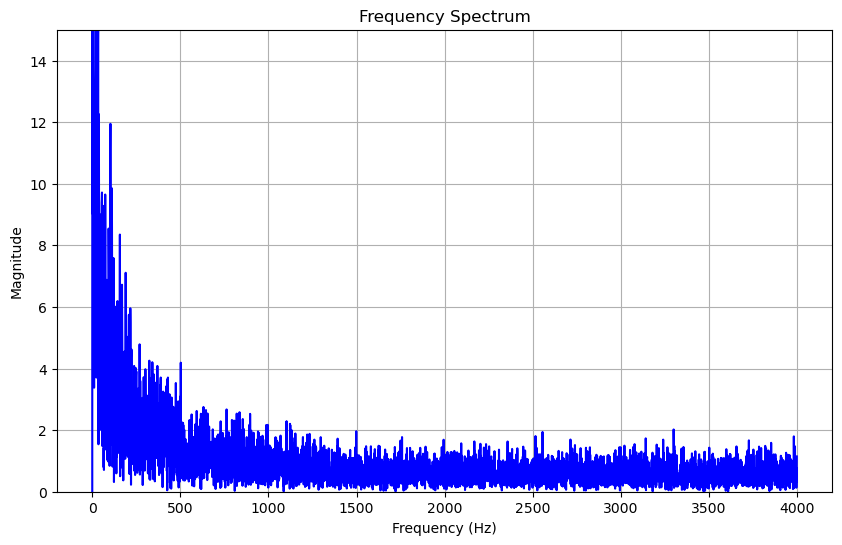

In [75]:
# Sampling frequency (inverse of the time step)
sampling_frequency = 8000

# Perform the FFT
fft_result = np.fft.fft(target)
fft_freqs = np.fft.fftfreq(len(target), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0,15)
plt.title('Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()

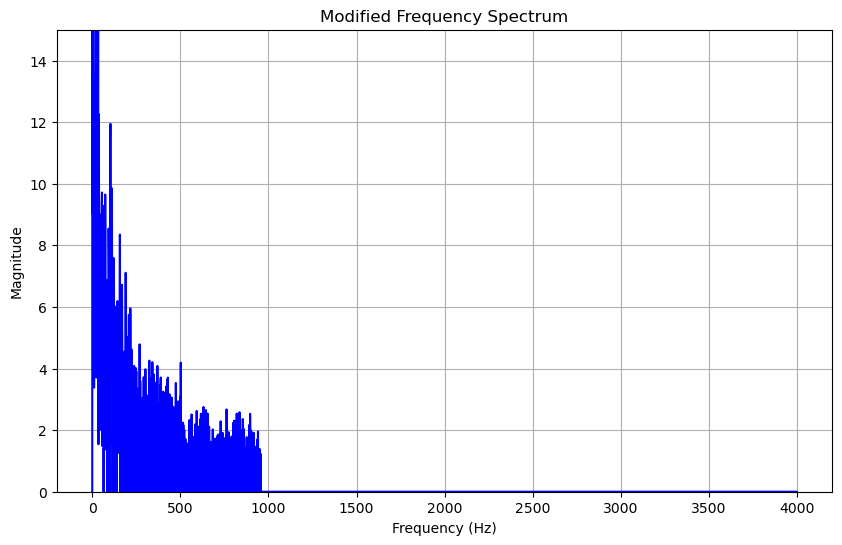

In [76]:
# Sample frequency data and FFT
sampling_frequency = 8000
fft_result = np.fft.fft(target)
fft_freqs = np.fft.fftfreq(len(target), 1 / sampling_frequency)
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0

# Define the frequency range (3000 Hz to 4000 Hz)
start_freq = 3500
end_freq = 4000

# Calculate the average magnitude in the specified frequency range
average_magnitude = np.mean(fft_magnitude[(fft_freqs >= start_freq) & (fft_freqs <= end_freq)])

# Calculate the threshold magnitude (twice the average magnitude)
threshold_magnitude = 2 * average_magnitude

# Set the magnitude of frequencies below the threshold to 0
fft_magnitude[fft_magnitude < threshold_magnitude] = 0

# Set the magnitude of frequencies to zero if they are 5 times bigger than the average magnitude of the previous 10 frequencies
window_size = 50
for i in range(window_size, len(fft_magnitude)):
    previous_magnitudes = fft_magnitude[i - window_size:i]
    if fft_magnitude[i] > 5 * np.mean(previous_magnitudes):
        fft_magnitude[i] = 0

# Plot the modified frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0, 15)
plt.title('Modified Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()


### Dataset 2

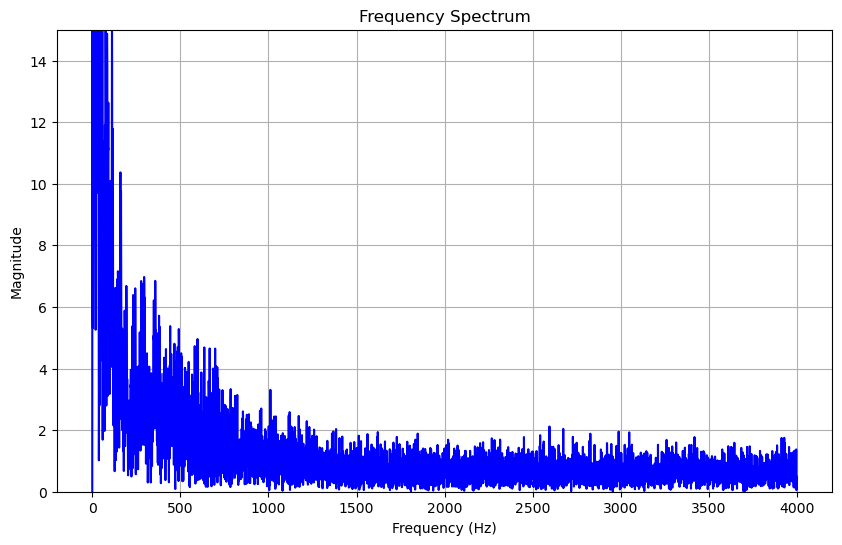

In [77]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('40ksps/40km_h2.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array

# Original data at 20 ks/s
original_data = voltage_data

# Downsampling factor (20 ks/s to 1 ks/s)
downsampling_factor = 5

# Calculate the length of the downsampled array
downsampled_length = len(original_data) // downsampling_factor

# Create an empty array for the downsampled data
downsampled_data = np.empty(downsampled_length)

# Perform downsampling by averaging
for i in range(downsampled_length):
    start_index = i * downsampling_factor
    end_index = start_index + downsampling_factor
    downsampled_data[i] = np.mean(original_data[start_index:end_index])

target = np.array(1000)



for i in range(len(downsampled_data)):
    if downsampled_data[i] > 1.875:
        target = downsampled_data[i-5000:5000+i]
        
        break
    
# Sampling frequency (inverse of the time step)
sampling_frequency = 8000

# Perform the FFT
fft_result = np.fft.fft(target)
fft_freqs = np.fft.fftfreq(len(target), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0,15)
plt.title('Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()


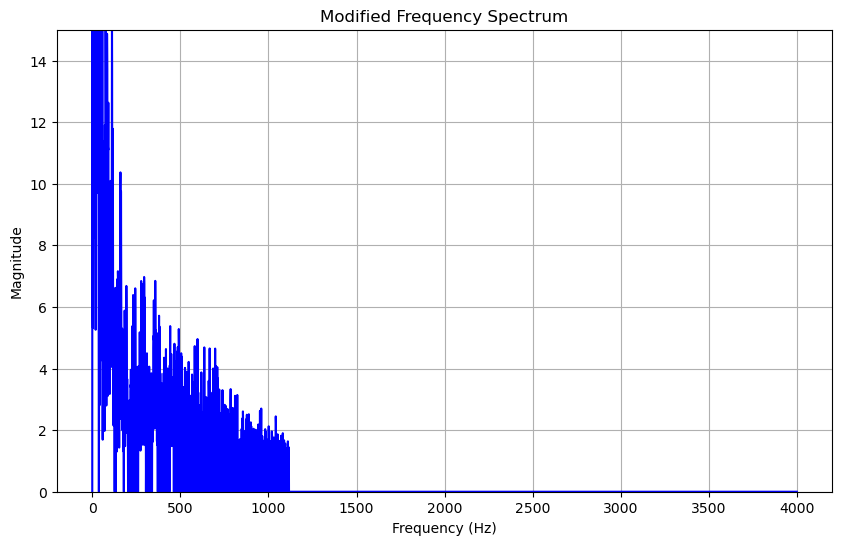

In [78]:
# Sample frequency data and FFT
sampling_frequency = 8000
fft_result = np.fft.fft(target)
fft_freqs = np.fft.fftfreq(len(target), 1 / sampling_frequency)
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0

# Define the frequency range (3000 Hz to 4000 Hz)
start_freq = 3500
end_freq = 4000

# Calculate the average magnitude in the specified frequency range
average_magnitude = np.mean(fft_magnitude[(fft_freqs >= start_freq) & (fft_freqs <= end_freq)])

# Calculate the threshold magnitude (twice the average magnitude)
threshold_magnitude = 2 * average_magnitude

# Set the magnitude of frequencies below the threshold to 0
fft_magnitude[fft_magnitude < threshold_magnitude] = 0

# Set the magnitude of frequencies to zero if they are 5 times bigger than the average magnitude of the previous 10 frequencies
window_size = 50
for i in range(window_size, len(fft_magnitude)):
    previous_magnitudes = fft_magnitude[i - window_size:i]
    if fft_magnitude[i] > 5 * np.mean(previous_magnitudes):
        fft_magnitude[i] = 0

# Plot the modified frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0, 15)
plt.title('Modified Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()


### Dataset 3

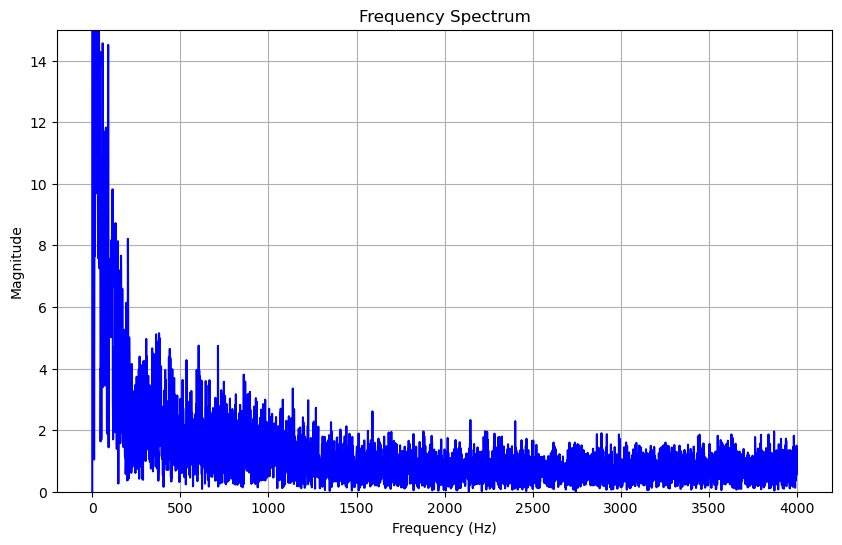

In [79]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('40ksps/40km_h3.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array

# Original data at 20 ks/s
original_data = voltage_data

# Downsampling factor (20 ks/s to 1 ks/s)
downsampling_factor = 5

# Calculate the length of the downsampled array
downsampled_length = len(original_data) // downsampling_factor

# Create an empty array for the downsampled data
downsampled_data = np.empty(downsampled_length)

# Perform downsampling by averaging
for i in range(downsampled_length):
    start_index = i * downsampling_factor
    end_index = start_index + downsampling_factor
    downsampled_data[i] = np.mean(original_data[start_index:end_index])

target = np.array(1000)



for i in range(len(downsampled_data)):
    if downsampled_data[i] > 1.875:
        target = downsampled_data[i-5000:5000+i]
        
        break
    
# Sampling frequency (inverse of the time step)
sampling_frequency = 8000

# Perform the FFT
fft_result = np.fft.fft(target)
fft_freqs = np.fft.fftfreq(len(target), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0,15)
plt.title('Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()


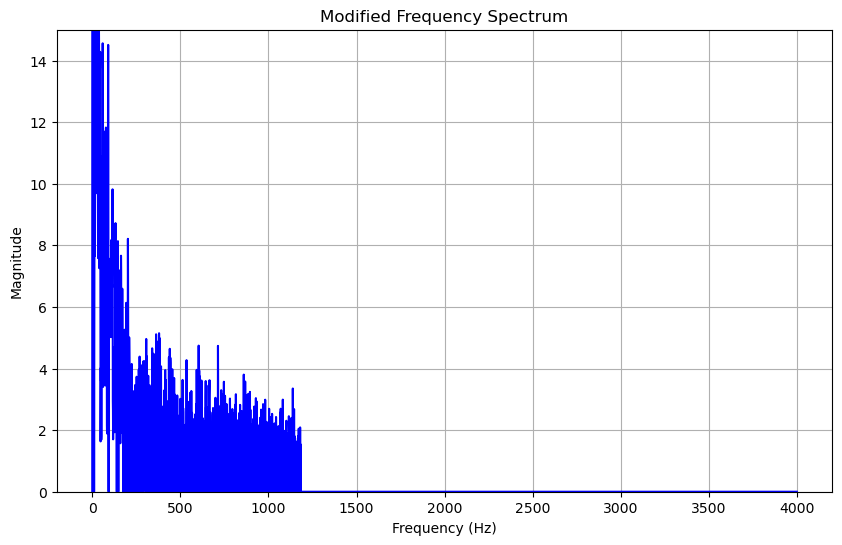

In [80]:
# Sample frequency data and FFT
sampling_frequency = 8000
fft_result = np.fft.fft(target)
fft_freqs = np.fft.fftfreq(len(target), 1 / sampling_frequency)
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0

# Define the frequency range (3000 Hz to 4000 Hz)
start_freq = 3500
end_freq = 4000

# Calculate the average magnitude in the specified frequency range
average_magnitude = np.mean(fft_magnitude[(fft_freqs >= start_freq) & (fft_freqs <= end_freq)])

# Calculate the threshold magnitude (twice the average magnitude)
threshold_magnitude = 2 * average_magnitude

# Set the magnitude of frequencies below the threshold to 0
fft_magnitude[fft_magnitude < threshold_magnitude] = 0

# Set the magnitude of frequencies to zero if they are 5 times bigger than the average magnitude of the previous 10 frequencies
window_size = 50
for i in range(window_size, len(fft_magnitude)):
    previous_magnitudes = fft_magnitude[i - window_size:i]
    if fft_magnitude[i] > 5 * np.mean(previous_magnitudes):
        fft_magnitude[i] = 0

# Plot the modified frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0, 15)
plt.title('Modified Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()
